In [57]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [58]:
df = pd.read_csv(r'I:\Python Learnings\Cleaning\Crash_Analysis_System_data.csv')
df.head()

,X,Y,OBJECTID,advisorySpeed,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,...,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB
0,1750249.0,5423532.0,1,NaN,577000.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,Urban,1.0,NaN,NaN,Fine,Null
1,1695602.0,5676963.0,2,NaN,552100.0,0.0,NaN,0.0,1.0,NaN,...,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null
2,1759262.0,5435868.0,3,NaN,569100.0,0.0,NaN,0.0,1.0,NaN,...,NaN,NaN,1.0,0.0,Urban,0.0,NaN,NaN,Fine,Null
3,1755344.0,5921876.0,4,NaN,515202.0,0.0,NaN,0.0,1.0,NaN,...,NaN,NaN,0.0,0.0,Open,0.0,NaN,NaN,Light rain,Null
4,1756593.0,5920535.0,7,NaN,514102.0,0.0,NaN,0.0,2.0,NaN,...,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null


In [59]:
df.shape

(885184, 72)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885184 entries, 0 to 885183
Data columns (total 72 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   X                          885184 non-null  float64
 1   Y                          885184 non-null  float64
 2   OBJECTID                   885184 non-null  int64  
 3   advisorySpeed              34771 non-null   float64
 4   areaUnitID                 885180 non-null  float64
 5   bicycle                    885179 non-null  float64
 6   bridge                     363131 non-null  float64
 7   bus                        885179 non-null  float64
 8   carStationWagon            885179 non-null  float64
 9   cliffBank                  363131 non-null  float64
 10  crashDirectionDescription  885184 non-null  object 
 11  crashFinancialYear         885184 non-null  object 
 12  crashLocation1             885184 non-null  object 
 13  crashLocation2             88

In [61]:
df = df.drop(columns={'X','Y','OBJECTID','areaUnitID','meshblockId','intersection','crashRoadSideRoad','fence','kerb','tree','phoneBoxEtc',
                      'crashDirectionDescription','crashFinancialYear','tlaId','directionRoleDescription','crashSHDescription','debris',
                      'guardRail','houseOrBuilding','intersection','objectThrownOrDropped','otherObject','slipOrFlood','postOrPole','strayAnimal','cliffBank','overBank','waterRiver',
                      'ditch','roadCharacter','roadLane','roadSurface','vehicle'
                      })


In [ ]:
df.info()

In [62]:
df.isnull().sum()

advisorySpeed          850413
bicycle                     5
bridge                 522053
bus                         5
carStationWagon             5
crashLocation1              0
crashLocation2           1735
crashSeverity               0
crashYear                   0
fatalCount                  1
flatHill                    0
holiday                836828
light                       0
minorInjuryCount            1
moped                       5
motorcycle                  5
NumberOfLanes            2150
otherVehicleType            5
parkedVehicle          522053
pedestrian             855983
region                   3353
roadworks              522053
schoolBus                   5
seriousInjuryCount          1
speedLimit               1231
streetLight            143118
suv                         5
taxi                        5
temporarySpeedLimit    870365
tlaName                     5
trafficControl              0
trafficIsland          522053
trafficSign            522053
train     

In [63]:
df = df.drop(columns={'parkedVehicle','pedestrian','advisorySpeed','bridge'
})

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885184 entries, 0 to 885183
Data columns (total 36 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   bicycle              885179 non-null  float64
 1   bus                  885179 non-null  float64
 2   carStationWagon      885179 non-null  float64
 3   crashLocation1       885184 non-null  object 
 4   crashLocation2       883449 non-null  object 
 5   crashSeverity        885184 non-null  object 
 6   crashYear            885184 non-null  int64  
 7   fatalCount           885183 non-null  float64
 8   flatHill             885184 non-null  object 
 9   holiday              48356 non-null   object 
 10  light                885184 non-null  object 
 11  minorInjuryCount     885183 non-null  float64
 12  moped                885179 non-null  float64
 13  motorcycle           885179 non-null  float64
 14  NumberOfLanes        883034 non-null  float64
 15  otherVehicleType 

In [65]:
df.dtypes

bicycle                float64
bus                    float64
carStationWagon        float64
crashLocation1          object
crashLocation2          object
crashSeverity           object
crashYear                int64
fatalCount             float64
flatHill                object
holiday                 object
light                   object
minorInjuryCount       float64
moped                  float64
motorcycle             float64
NumberOfLanes          float64
otherVehicleType       float64
region                  object
roadworks              float64
schoolBus              float64
seriousInjuryCount     float64
speedLimit             float64
streetLight             object
suv                    float64
taxi                   float64
temporarySpeedLimit    float64
tlaName                 object
trafficControl          object
trafficIsland          float64
trafficSign            float64
train                  float64
truck                  float64
unknownVehicleType     float64
urban   

In [66]:
num_cols = df.select_dtypes(include='float').columns

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())
    

In [67]:
cat_cols= df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


### Data Visualization

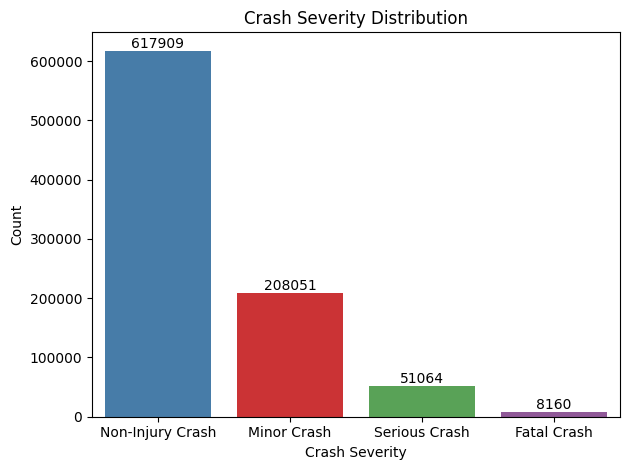

In [68]:
ax = sns.countplot(data=df, x='crashSeverity', hue='crashSeverity', order=df['crashSeverity'].value_counts().index, palette='Set1', legend=False)

for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(bar.get_height()), 
            ha='center', va='bottom')
    
plt.title('Crash Severity Distribution')
plt.xlabel('Crash Severity')
plt.ylabel('Count')

plt.tight_layout()
plt.savefig('crash_severity_plot.png', dpi=300) 
plt.show()

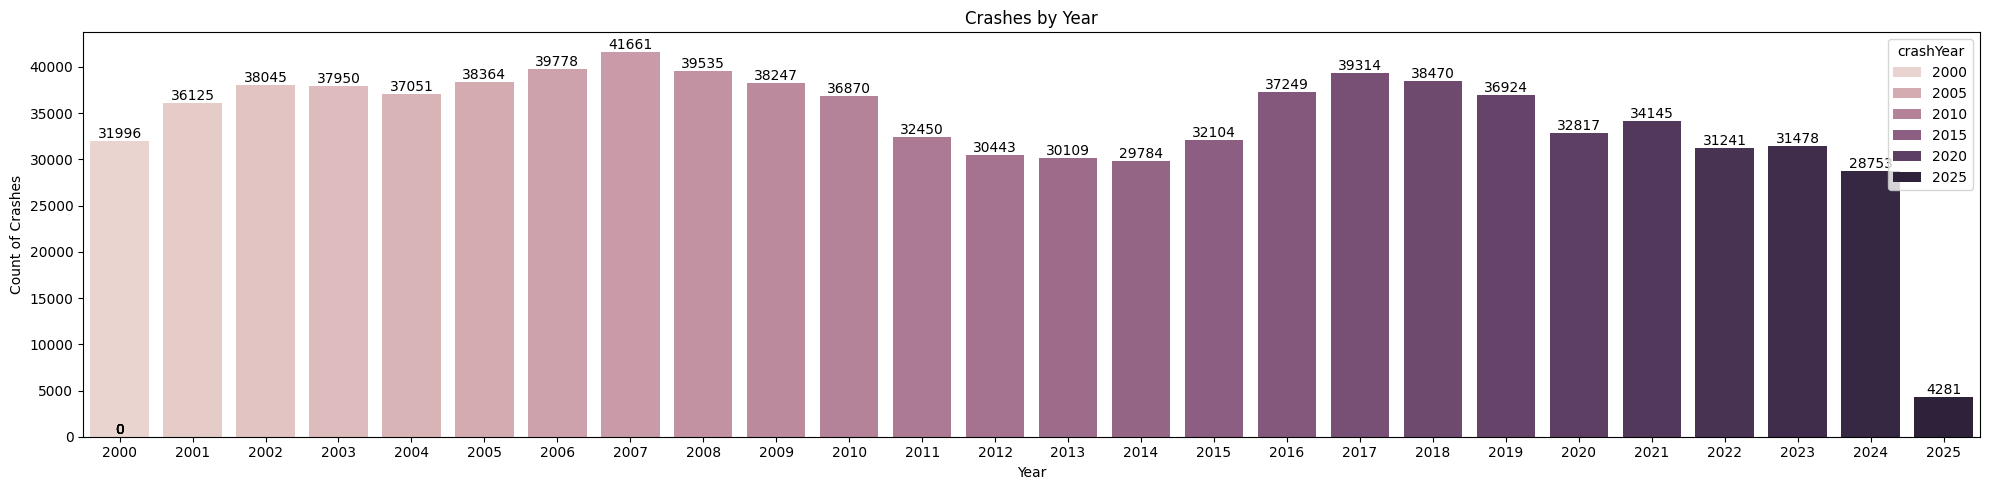

In [69]:
#Crashes by Year

plt.figure(figsize=(20,5))

ax = sns.countplot(data=df, x='crashYear', hue='crashYear')

for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(bar.get_height()), 
            ha='center', va='bottom')
    
plt.title("Crashes by Year")
plt.xlabel('Year')
plt.ylabel('Count of Crashes')

plt.tight_layout()
plt.savefig('crash_count_year.png', dpi=300)  
plt.show()


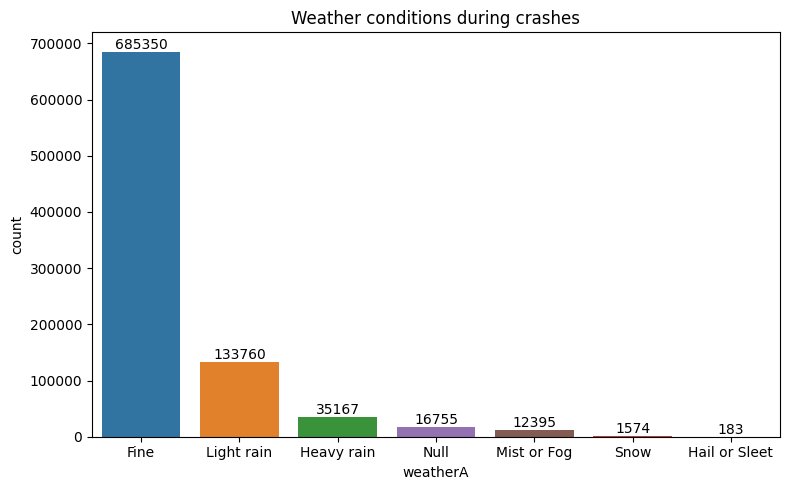

In [70]:
#Crashes by Weather Conditions

plt.figure(figsize=(8,5))

ax = sns.countplot(data=df, x='weatherA', hue='weatherA', order=df['weatherA'].value_counts().index)

for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(bar.get_height()), 
            ha='center', va='bottom')
    
plt.title('Weather conditions during crashes')

plt.tight_layout()
plt.savefig('crash_count_weather.png', dpi=300)  
plt.show()



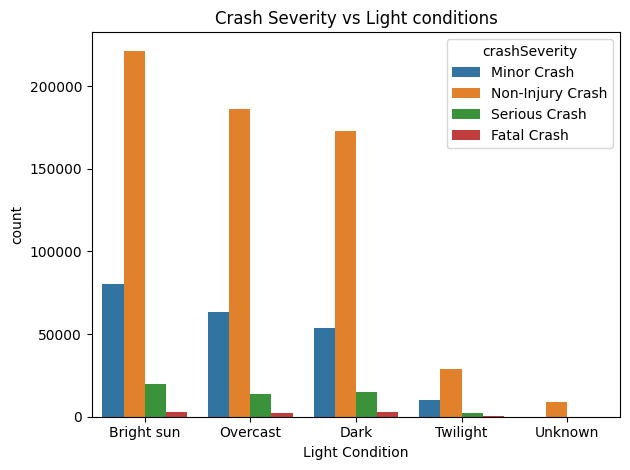

In [71]:
#Crash Severity vs Light conditions
plt.Figure(figsize=(10,6))

sns.countplot(data=df, x='light', hue='crashSeverity', order=df['light'].value_counts().index)


       
plt.title('Crash Severity vs Light conditions')
plt.xlabel('Light Condition')

plt.tight_layout()
plt.savefig('crash_severity_light.png', dpi=300)  
plt.show()




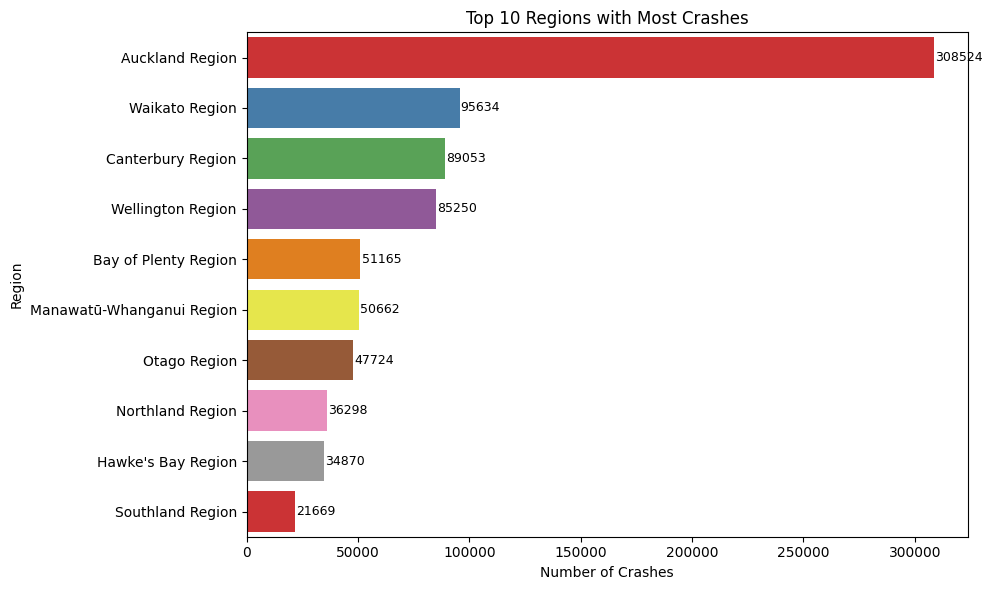

In [ ]:
#Top 10 regions with most crashes

top_regions = df['region'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_regions.values, y=top_regions.index, hue=top_regions.index, palette='Set1', legend=False)

# Add values on top of the bars
for i, (value, name) in enumerate(zip(top_regions.values, top_regions.index)):
    ax.text(value + 500, i, str(value), va='center', fontsize=9)

plt.title('Top 10 Regions with Most Crashes')
plt.xlabel('Number of Crashes')
plt.ylabel('Region')

plt.tight_layout()
plt.savefig('crash_severity_region.png', dpi=300)
plt.show()




In [ ]:
str(df['region'].unique())

<Axes: xlabel='CrashCount', ylabel='SubRegion'>

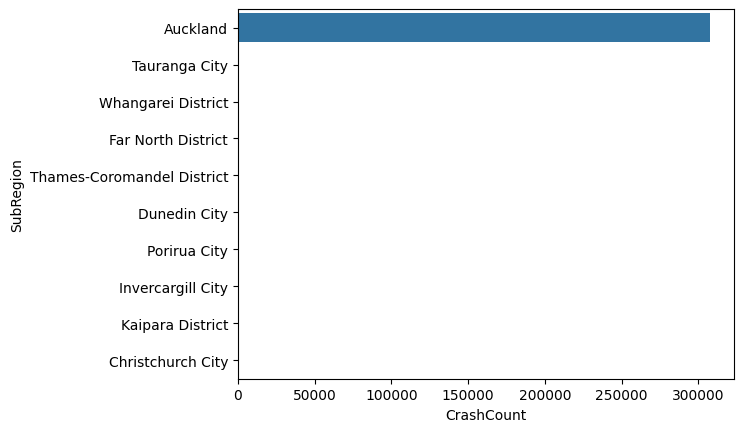

In [73]:
#Top 10 sub-regions in Auckland with the most crashes

auckland_df = df[df['region'] == 'Auckland Region']

top_subregions = (
    auckland_df['tlaName'].value_counts().nlargest(10).reset_index().
    rename(columns={'tlaName': 'SubRegion', 'count': 'CrashCount'})
    )

top_subregions.head()

sns.barplot(data=top_subregions, x='CrashCount', y='SubRegion')




In [74]:
auckland_df['tlaName'].value_counts()

tlaName
Auckland                          307838
Tauranga City                        213
Whangarei District                    94
Far North District                    62
Thames-Coromandel District            60
Dunedin City                          27
Porirua City                          26
Invercargill City                     24
Kaipara District                      23
Christchurch City                     23
Tasman District                       17
Southland District                    16
Horowhenua District                   15
Manawatu District                     15
Waikato District                       9
Kaikoura District                      9
Kapiti Coast District                  7
Masterton District                     4
Nelson City                            4
Central Hawke's Bay District           4
Western Bay of Plenty District         4
South Wairarapa District               3
Napier City                            3
Whakatane District                     2
Lower Hu

In [75]:
df.dtypes

bicycle                float64
bus                    float64
carStationWagon        float64
crashLocation1          object
crashLocation2          object
crashSeverity           object
crashYear                int64
fatalCount             float64
flatHill                object
holiday                 object
light                   object
minorInjuryCount       float64
moped                  float64
motorcycle             float64
NumberOfLanes          float64
otherVehicleType       float64
region                  object
roadworks              float64
schoolBus              float64
seriousInjuryCount     float64
speedLimit             float64
streetLight             object
suv                    float64
taxi                   float64
temporarySpeedLimit    float64
tlaName                 object
trafficControl          object
trafficIsland          float64
trafficSign            float64
train                  float64
truck                  float64
unknownVehicleType     float64
urban   

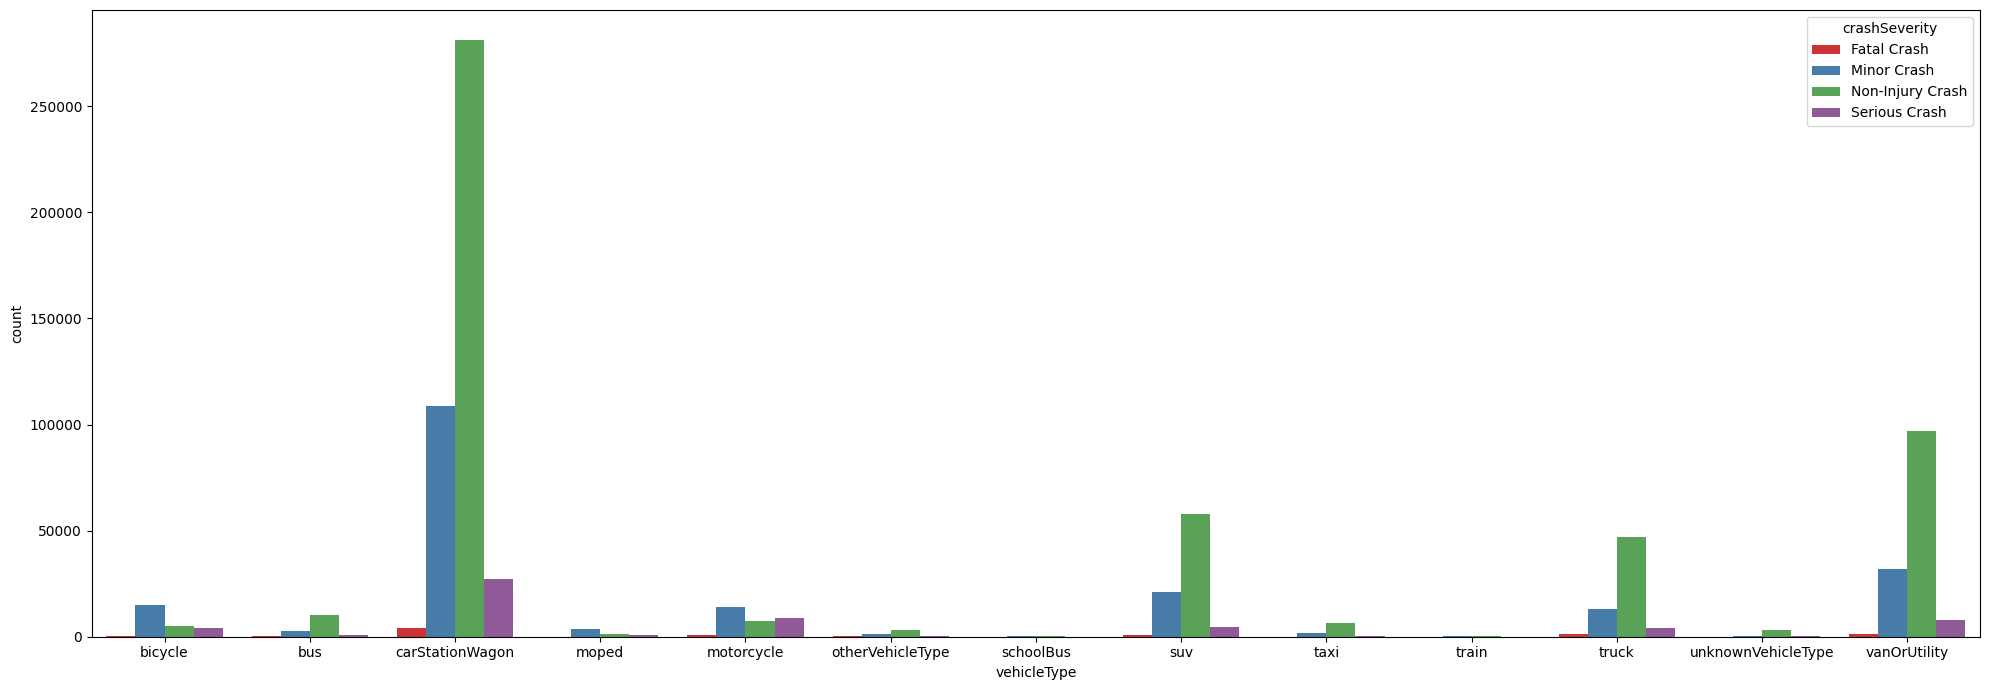

In [76]:
vehicle_cols= [
    'bicycle', 'bus', 'carStationWagon', 'moped', 'motorcycle', 'otherVehicleType',
    'schoolBus', 'suv', 'taxi', 'train', 'truck', 'unknownVehicleType', 'vanOrUtility'
]

for col in vehicle_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

vehicle_melted =df.melt(
                        id_vars='crashSeverity',
                        value_vars=vehicle_cols,
                        var_name='vehicleType',
                        value_name='involved'    
                    )

involved_df = vehicle_melted[vehicle_melted['involved'] == 1]

#Group
grouped = (
    involved_df
    .groupby(['vehicleType', 'crashSeverity'])
    .size()
    .reset_index(name='count')
) 

plt.figure(figsize=(20,7))
sns.barplot(data=grouped, x='vehicleType', y='count', hue='crashSeverity', palette='Set1')


plt.tight_layout()
plt.savefig('crash_severity_vehicletype.png', dpi=300)  
plt.show()



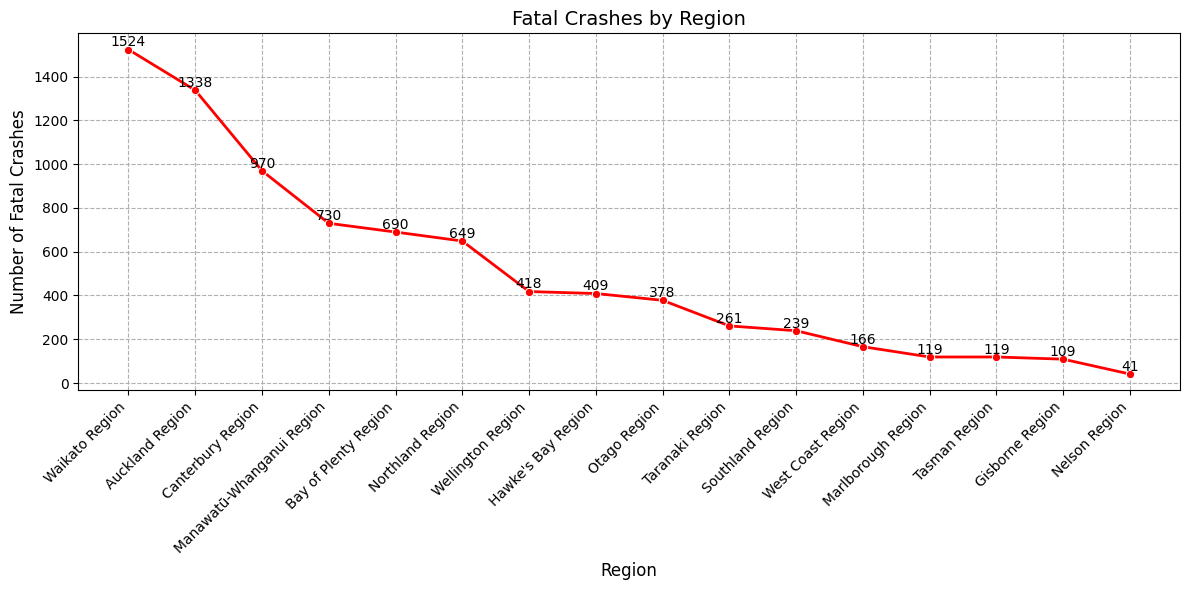

In [86]:
#Fatal Crashes by Region

fatal_df = df[df['crashSeverity'] == 'Fatal Crash']

fatal_counts = fatal_df['region'].value_counts().reset_index()
fatal_counts.columns = ['region', 'count']

# Sort regions by count (descending) for better visualization
fatal_counts = fatal_counts.sort_values('count', ascending=False)

# Create the line plot
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=fatal_counts, x='region', y='count', marker='o', color='red', linewidth=2)

# Add value labels above each point
for i, row in fatal_counts.iterrows():ax.text(i, row['count'] + 0.5, f'{int(row["count"])}', ha='center', va='bottom', fontsize=10)

plt.title('Fatal Crashes by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Fatal Crashes', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.grid(True, linestyle='--')

plt.tight_layout()

plt.savefig('fatal_crashes_by_region_lineplot.png', dpi=300)
plt.show()